In [1]:
import read_muram as rmu
import dp_plot_tools as dplt
import muram_eos as eos
import numpy as np

Importing read_muram.py
Importing dp_plot_tools.py
Importing muram_eos.py


In [2]:
## Load the EOS file
eos_file = "../RUNDIR/Uppsala_mergedeos_PI_A.dat"
mu_eos=eos.mu_eos(eos_file)

In [6]:
## Set the simulation size and range
## Nz = vertical direction (dimension 0 in MURaM)
## Nx = first horizontal direction (set = 1 for 1D)
## Ny = second horizontal direection (set = 1 for 2D or 1D)

Nz = 400
Nx = 400
Ny = 400

## Output Directory

out_dir = "/scratch/przybylski/2D_SCATTER_TESTS/checkerboard/"

## Iteration Number to be output 

iter = 39000

inv4pi = 1.0/np.sqrt(4.0*np.pi)

0.0


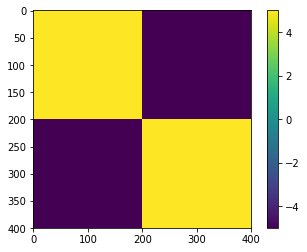

In [7]:
## Checkerboard

## Out array - backwards because that is the way numpy writes and we have (z,x,y)
bz = np.zeros([Ny,Nx,1])
## Field Strength of each checker
field_strength = 5.0

## Number of Checkers Identical in x/y or can be varied

checkersx = 2
checkersy = checkersx

## if 2D
if Ny == 1:
    checkersy=1

for i in range(checkersx):
    for j in range(checkersy):
        bz[j*Ny//checkersy:(j+1)*Ny//checkersy,i*Nx//checkersx:(i+1)*Nx//checkersx,0] += np.power(-1,i)*np.power(-1,j)*field_strength

## Plot
if Ny > 1:
    dplt.plt.imshow(bz[:,:,0])
    dplt.plt.colorbar()
else:
    dplt.plt.plot(bz[0,:,0])

## And FInally save
(np.tile(bz*inv4pi,(1,1,Nz)).ravel().astype(np.single)).tofile(out_dir+'3D/result_prim_5.' + str(iter).zfill(6))

print(bz[:,:].mean())

0.008


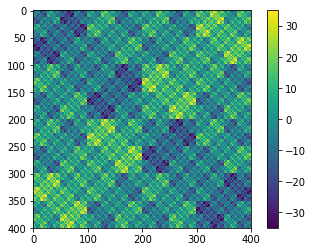

In [8]:
## Nested Checkerboard

## Out array - backwards because that is the way numpy writes and we have (z,x,y)
bz = np.zeros([Ny,Nx,1])
## Field Strength of each checker
field_strength = 5.0
## Max checkers, either floor(log2(Nx)), or set to a value of your choosing
maxcheckers = np.int(np.floor(np.log2(max(Nx,Ny))))
## maxcheckers = 5

for nn in range(1,maxcheckers):
    ## Number of checkers
    checkers=2**nn
    
    #Stop one dimension 
    if (2**nn > Nx):
        checkersx= 1
    else:
        checkersx= checkers
        
    if (2**nn > Ny):
        checkersy= 1
    else:
        checkersy= checkers
    
    ## Random number to decide whether +ve or -ve checker comes first
    if Ny == 1:
        c=0
    else:
        c=np.ceil(np.random.rand()*2)
        
    d=np.ceil(np.random.rand()*2)
    
    for i in range(checkersx):
        for j in range(checkersy):
            bz[j*Ny//checkersy:(j+1)*Ny//checkersy,i*Nx//checkersx:(i+1)*Nx//checkersx,0] += np.power(-1,i+c)*np.power(-1,j+d)*field_strength

## Plot
if Ny > 1:
    dplt.plt.imshow(bz[:,:,0])
    dplt.plt.colorbar()
else:
    dplt.plt.plot(bz[0,:,0])

## And FInally save
(np.tile(bz*inv4pi,(1,1,Nz)).ravel().astype(np.single)).tofile(out_dir+'3D/result_prim_5.' + str(iter).zfill(6))

print(bz[:,:].mean())

In [55]:
## Constant horizontal (By) field in gauss

field_strength = 0

(np.tile(field_strength*inv4pi,(Ny,Nx,Nz)).ravel().astype(np.single)).tofile(out_dir+'3D/result_prim_7.' + str(iter).zfill(6))

In [ ]:
## Constant vertical field in gauss (Bz)

field_strength = 20

(np.tile(field_strength*inv4pi,(Ny,Nx,1)).ravel().astype(np.single)).tofile(out_dir+'3D/result_prim_5.' + str(iter).zfill(6))

In [ ]:
## Random Field for SSD

## Will give a field with RMS ~1.0e-3 G, constant in vertical direction, random in horizontal direction
a=(np.random.rand(Ny,Nx,1)-0.5)*3.5e-3
np.sqrt((a*a).mean())
(np.tile(a*inv4pi,(1,1,Nz)).ravel().astype(np.single)).tofile(out_dir+'3D/result_prim_5.' + str(iter).zfill(6))